## Q&A Activity – Week 07
1. Carry out descriptive analytics on the dataset.
2. Check whether female and male students scored the same marks.
3. Whether test preparation helps the students

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("dataset w7.csv")

## 1. Descriptive analysis

In [3]:
df.head()

,Gender,Test preparation,Total Marks
0,male,none,14
1,female,none,28
2,female,none,18
3,female,none,48
4,female,none,21


In [4]:
df.shape

(28, 3)

In [5]:
df.dtypes

Gender              object
Test preparation    object
Total Marks          int64
dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

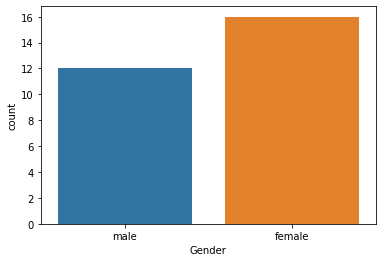

In [6]:
sns.countplot(data = df, x='Gender')

***
The given data has female count higher than male count. But the difference is small.
***

<AxesSubplot:xlabel='Test preparation', ylabel='count'>

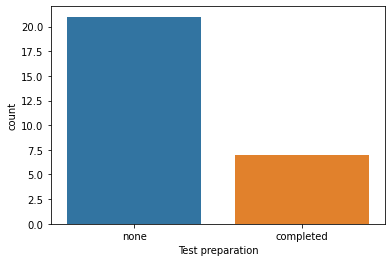

In [7]:
sns.countplot(data = df, x ='Test preparation')

***
In the given data, there are only few students whose test preparation status is completed.



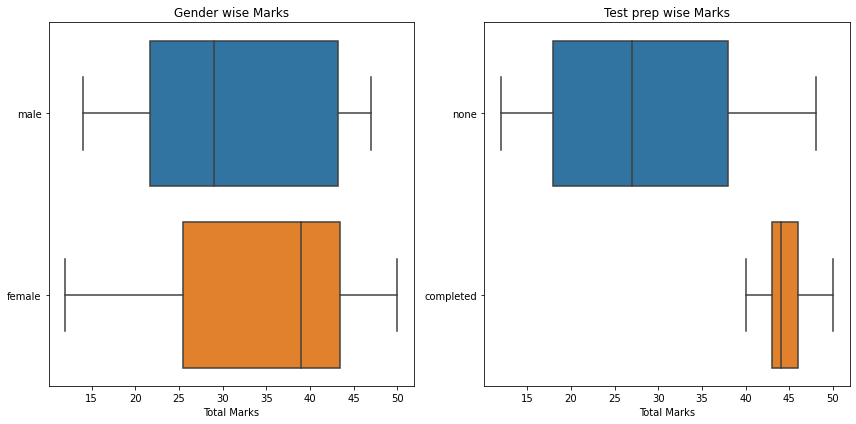

In [8]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.boxplot(data =df, x= 'Total Marks', y ='Gender')
plt.title("Gender wise Marks")
plt.ylabel("")
plt.subplot(1,2,2)
sns.boxplot(data =df, x= 'Total Marks', y ='Test preparation')
plt.title("Test prep wise Marks")
plt.ylabel("")
plt.tight_layout()

In [9]:
df.groupby(by ='Gender')['Total Marks'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
female,16.0,33.750000,12.865976,12.0,25.50,39.0,43.50,50.0
male,12.0,30.416667,12.168950,14.0,21.75,29.0,43.25,47.0


As per the given data, mean and variation doesnt vary much across gender. Note that the median shows variation . In Total marks distribution, data shows, higher values for those who completed test preparation.

## 2.Check whether female and male students scored the same marks.

We will use a ttest with  alpha =.05 to determine if there exist a significant difference in mean marks among male and female.The status quo is that female and male students score the same marks.

 * H0: female and male students score the same marks.
 * H1: female and male students did not score the same marks.

In [10]:
# seperate male and female marks.
male = df[df['Gender']=='male']['Total Marks']
female = df[df['Gender']=='female']['Total Marks']
alpha = .05

In [11]:
# import ttset module
from scipy.stats import ttest_ind

In [12]:
_,p = ttest_ind(male,female)
print("p value :", p)
if p < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0.")

p value : 0.4937822317960763
Fail to reject H0.


***
From the t-test we can conclude that, female and male students scored the same marks.
***

## 3. Whether test preparation helps the students

We will use a ttest with alpha =.05, to check if there is a significant differnce in mean marks among students whose test preparation status is completed vs none. Status quo will be test preparation doesnt have any effect on total marks.

* H0: test preparation doesnt help students
* H1: test preparation help students    

In [13]:
tp_none = df[df['Test preparation']=='none']['Total Marks']
tp_completed = df[df['Test preparation']=='completed']['Total Marks']

In [14]:
_,p = ttest_ind(tp_none,tp_completed)

In [15]:
print("p value :", p)
if p < alpha:
    print("Reject H0")
else:
    print("Fail to reject H0.") 

p value : 0.0012671292457320106
Reject H0


From the test we can conclude that, test preparation help students.